In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

The data for this problem is in the CSV file "firearms-urban.csv". The columns of interest for this investigation are:

* **RATE-2014**: The firearms mortality rate by state from 2014. 

* **Percent Urban**: The percentage of the total population in urban areas, from https://www.icip.iastate.edu/tables/population/urban-pct-states . Although this data is 2010, it should be sufficiently accurate for our purposes.


(a) Read in the file and convert it to a Pandas dataframe

In [2]:
df=pd.read_csv("firearms-urban.csv")

In [3]:
df

,STATE,RATE-2014,Percent Urban
0,AL,16.9,59.0
1,AK,19.2,66.0
2,AZ,13.5,89.8
3,AR,16.6,56.2
4,CA,7.4,95.0
5,CO,12.2,86.2
6,CT,5.0,88.0
7,DE,11.1,83.3
8,FL,11.5,91.2
9,GA,13.7,75.1


(b) Create a scatter plot of the firearms mortality rate (y-axis) vs the percentage of the population living in urban areas (x-axis). Label the axes. Plot the point for Florida using a different color and/or marker style.



In [4]:
# Use the STATE column as the index
df= df.set_index("STATE")
df.loc['FL']

RATE-2014        11.5
Percent Urban    91.2
Name: FL, dtype: float64

Text(0,0.5,'Firearms mortality rate')

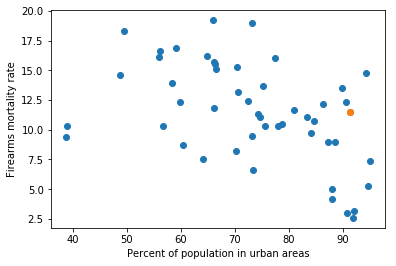

In [5]:
plt.scatter(df['Percent Urban'],df['RATE-2014'])
plt.scatter(df.loc['FL']['Percent Urban'],df.loc['FL']['RATE-2014'])
plt.xlabel('Percent of population in urban areas')
plt.ylabel('Firearms mortality rate')


(c) We will partition the states as follows: Urban states have $>80$% of the population living in urban areas. Rural states have $\le 80$% of the population living in urban areas. On the same graph, plot histograms for the firearms mortality rates of urban and rural states. Use the same bin indices for both histograms. Use transparency to make the histograms more readable. Add a legend and axes labels.


In [6]:
urban=df[df['Percent Urban']>80]['RATE-2014']
rural=df[df['Percent Urban']<=80]['RATE-2014']
pooled=df['RATE-2014']

Text(0,0.5,'Counts')

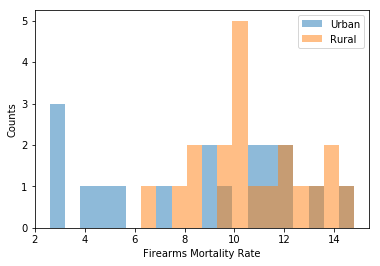

In [7]:
counts,mybins,patches=plt.hist(urban,bins=20,alpha=0.5,label="Urban")
plt.hist(rural,bins=mybins,alpha=0.5,label="Rural")
plt.legend()
plt.xlabel("Firearms Mortality Rate")
plt.ylabel("Counts")

(d) Find the mean firearms mortality rates for both urban and rural states. Compute the difference in means.

In [8]:
urban.mean(),rural.mean()

(8.677777777777777, 12.993750000000002)

In [9]:
diff=rural.mean()-urban.mean()
diff

4.315972222222225

(e) Find the median firearms mortality rates for both urban and rural states. 

(f) In a sentence or two, comment on the results of parts d) and e).

In [10]:
np.median(urban),np.median(rural)

(9.35, 12.8)

(g) Construct a two-sided binary hypothesis test using analytical techniques and determine the probability of such a large difference in means under the null hypothesis. Discuss the results.

The data comes from a single distribution, which implies same means and same variances

So, we will use the T-random variable to model this. We know: mean of T is 0, and we need to calculate the variance from the data

In [11]:
pooled_mean=pooled.mean()
pooled_mean

11.440000000000003

In [12]:
np.sum((pooled-pooled_mean)**2)/(len(pooled)-1)

17.220408163265304

In [13]:
pooled_var=np.var(pooled,ddof=1)
pooled_var

17.22040816326531

In [14]:
# We need to caLculate the variance of the difference of sample mean estimators
sm_var=pooled_var*(1/len(urban)+1/len(rural))
sm_var

1.4948270975056694

In [15]:
# Last parameter of T: degrees of freedom
dof=len(pooled)-2
dof= (len(urban)-1) + (len(rural)-1)

In [16]:
import scipy.stats as stats

## New way of doing this

I am replacing the way I did this in the class to make it clearer and make the assignment easier!

In [17]:
myt=stats.t(dof,scale=np.sqrt(sm_var))
# We set the variance of the T random variable here, rather than scaling in the .sf() method

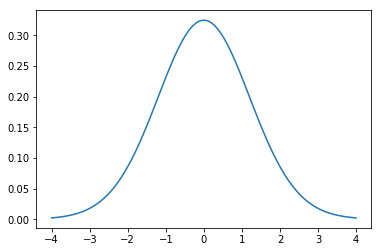

In [18]:
t=np.linspace(-4,4
              ,100)
plt.plot(t, myt.pdf(t))
# Note that this is slightly different than before
# because of the increased variance

In [19]:
#1-sided test
# We don't need to scale diff any more!
# I feel like this is easier to understand
myt.sf(diff)

0.0004639918961189169

In [20]:
# 2-sided test
2*myt.sf(diff)

0.0009279837922378338

In [21]:
# other 1-sided
myt.cdf(-diff)

0.0004639918961189169

## How it was done in class

In [22]:
myt=stats.t(dof)

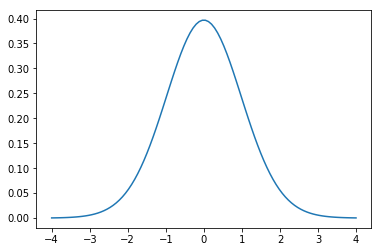

In [23]:
t=np.linspace(-4,4
              ,100)
plt.plot(t, myt.pdf(t))

In [24]:
#1-sided test
myt.sf(diff/np.sqrt(sm_var))

0.0004639918961189169

In [25]:
diff/np.sqrt(sm_var)

3.530068720144798

In [26]:
# 2-sided test
2*myt.sf(diff/np.sqrt(sm_var))

0.0009279837922378338

In [27]:
# other 1-sided
myt.cdf(-diff/np.sqrt(sm_var))

0.0004639918961189169

### Lecture 29 Assignment


Use the Student's $T$ random variable to determine a 95% confidence interval for the mean difference under the null hypothesis. Is the resulting confidence interval compatible with the observed difference of means?

*Hint:* The inverse CDF function in ```scipy.stats``` is called the Percent point function (PPF) and is given by the ```ppf``` method of random variable objects.